In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
encuestas = [
  {"Opinion": "Bored", "When": "Before", "Percentage": 11}, 
  {"Opinion": "Not great", "When": "Before", "Percentage": 5}, 
  {"Opinion": "Ok", "When": "Before", "Percentage": 40}, 
  {"Opinion": "Kind of interested", "When": "Before", "Percentage": 25}, 
  {"Opinion": "Excited", "When": "Before", "Percentage": 19}, 
  {"Opinion": "Bored", "When": "After", "Percentage": 12}, 
  {"Opinion": "Not great", "When": "After", "Percentage": 6}, 
  {"Opinion": "Ok", "When": "After", "Percentage": 14}, 
  {"Opinion": "Kind of interested", "When": "After", "Percentage": 30}, 
  {"Opinion": "Excited", "When": "After", "Percentage": 38}
]

La propuesta original para presentar los datos es:

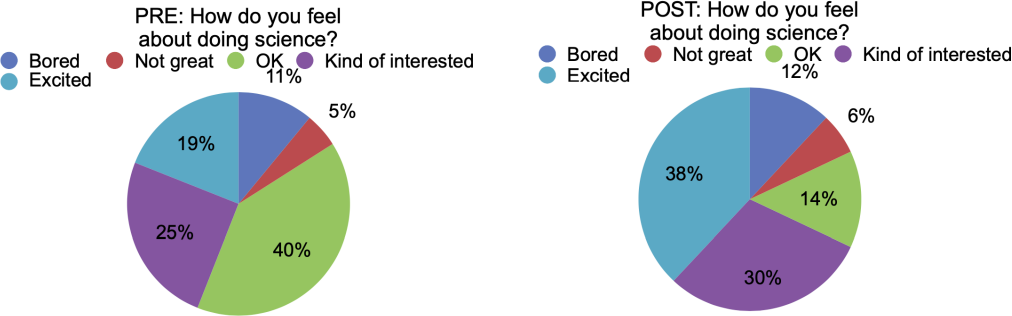

In [ ]:
encuestas_df = pd.DataFrame(encuestas)
before = encuestas_df[encuestas_df['When'] == 'Before']
after = encuestas_df[encuestas_df['When'] == 'After']

encuestas_df

,Opinion,When,Percentage
0,Bored,Before,11
1,Not great,Before,5
2,Ok,Before,40
3,Kind of interested,Before,25
4,Excited,Before,19
5,Bored,After,12
6,Not great,After,6
7,Ok,After,14
8,Kind of interested,After,30
9,Excited,After,38


La técnica de data-ink consiste en:

1. Reducir el no data-ink.
2. Resaltar el data-ink.

Entonces, como primer paso, vamos a compactar el texto y las leyendas redundantes de la gráfica original.

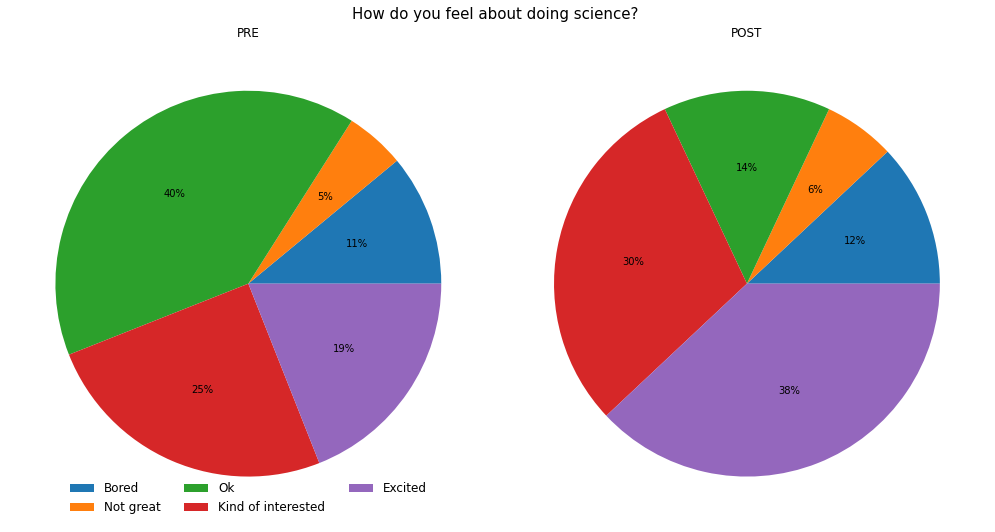

In [ ]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.pie(before['Percentage'], autopct='%.0f%%', labels=before['Opinion'], labeldistance=None)
plt.title('PRE')
plt.legend(ncol=3, loc='lower center', frameon=False, fontsize=12)

plt.subplot(1, 2, 2)
plt.pie(after['Percentage'], autopct='%.0f%%', labels=after['Opinion'], labeldistance=None)
plt.title('POST')

plt.suptitle('How do you feel about doing science?', fontsize=15)
plt.tight_layout()

plt.show()

Puesto que los gráficos de torta son difíciles de comparar visualmente (recordemos que se desea evaluar el cambio de PRE a POS) unificaremos aún más la visualización usando un gráfico de pendiente, que permitirá mostrar de manera más natural el cambio.

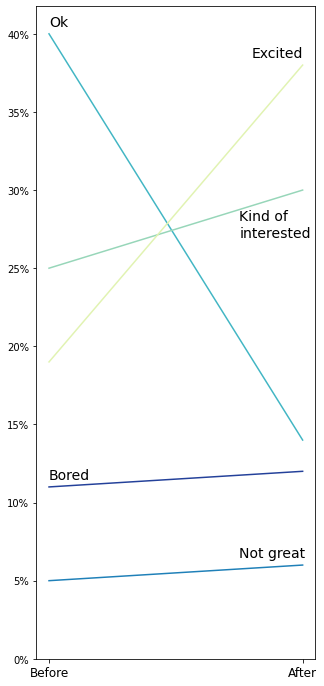

In [234]:
plt.figure(figsize=(5, 12))
ax = sns.lineplot(x="When", y="Percentage", hue="Opinion", data=encuestas_df, palette='YlGnBu_r')
plt.text(0, 11.5, 'Bored', fontsize=14)
plt.text(0.75, 6.5, 'Not great', fontsize=14)
plt.text(0, 40.5, 'Ok', fontsize=14)
plt.text(0.75, 27, 'Kind of\ninterested', fontsize=14)
plt.text(0.8, 38.5, 'Excited', fontsize=14)
plt.xticks(fontsize=12)
pct_range = np.arange(0, 45, 5)
plt.yticks(pct_range, ['{}%'.format(x) for x in pct_range])
plt.legend('',frameon=False)
plt.xlabel('')
plt.ylabel('')
plt.show()

Alternativamente, para las personas más "tradicionales", otra propuesta sería un gráfico de barras, el cual se muestre lado a lado el cambio en la Opinión cuando se pasa de PRE a POS.

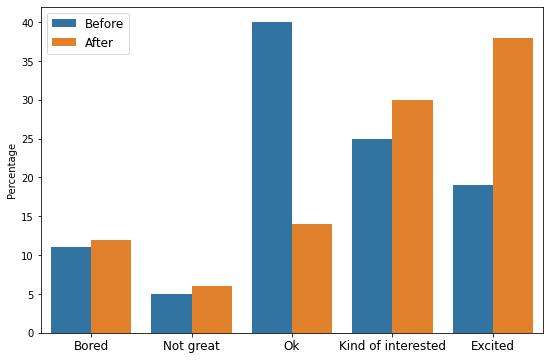

In [235]:
plt.figure(figsize=(9, 6))
sns.barplot(x="Opinion", y="Percentage", hue="When", data=encuestas_df)
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.xlabel('')
plt.show()